In [33]:
%load_ext autoreload
%autoreload 2

from Classes.Artifact import Artifact
from Classes.Artist import Artist
from Classes.Collection import Collection
from Classes.utils import visualize_rdf_graph
import pandas as pd

In [34]:
df = pd.read_csv("../Data/MetObjects_Cleaned.csv", low_memory=False)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33726 entries, 0 to 33725
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           33726 non-null  int64  
 1   Object ID            33726 non-null  int64  
 2   Department           33726 non-null  object 
 3   AccessionYear        33505 non-null  object 
 4   Object Name          33691 non-null  object 
 5   Title                33726 non-null  object 
 6   Culture              32410 non-null  object 
 7   Period               29900 non-null  object 
 8   Medium               33710 non-null  object 
 9   Classification       33696 non-null  object 
 10  Credit Line          33716 non-null  object 
 11  Object Wikidata URL  7564 non-null   object 
 12  Tags                 5664 non-null   object 
 13  Tags AAT URL         5664 non-null   object 
 14  Tags Wikidata URL    5664 non-null   object 
 15  Artist Display Name  2145 non-null  

In [36]:
indexes_with_artist = df[df["Artist Display Name"].notna()].index

indexes_with_artist

Index([  363,   837,   964,  1359,  1372,  5136,  5151,  5200,  5202,  5203,
       ...
       32440, 33612, 33643, 33644, 33647, 33662, 33696, 33697, 33698, 33699],
      dtype='int64', length=2145)

In [37]:
collection = Collection("Roman and Greek Artifacts Collection")

In [51]:
for i in range(50):
    index = indexes_with_artist[i]
    artifact = Artifact.from_dataframe(df, index)
    collection.add_artifact(artifact)

    artist = Artist.from_dataframe(df, index)
    collection.add_artist(artist)

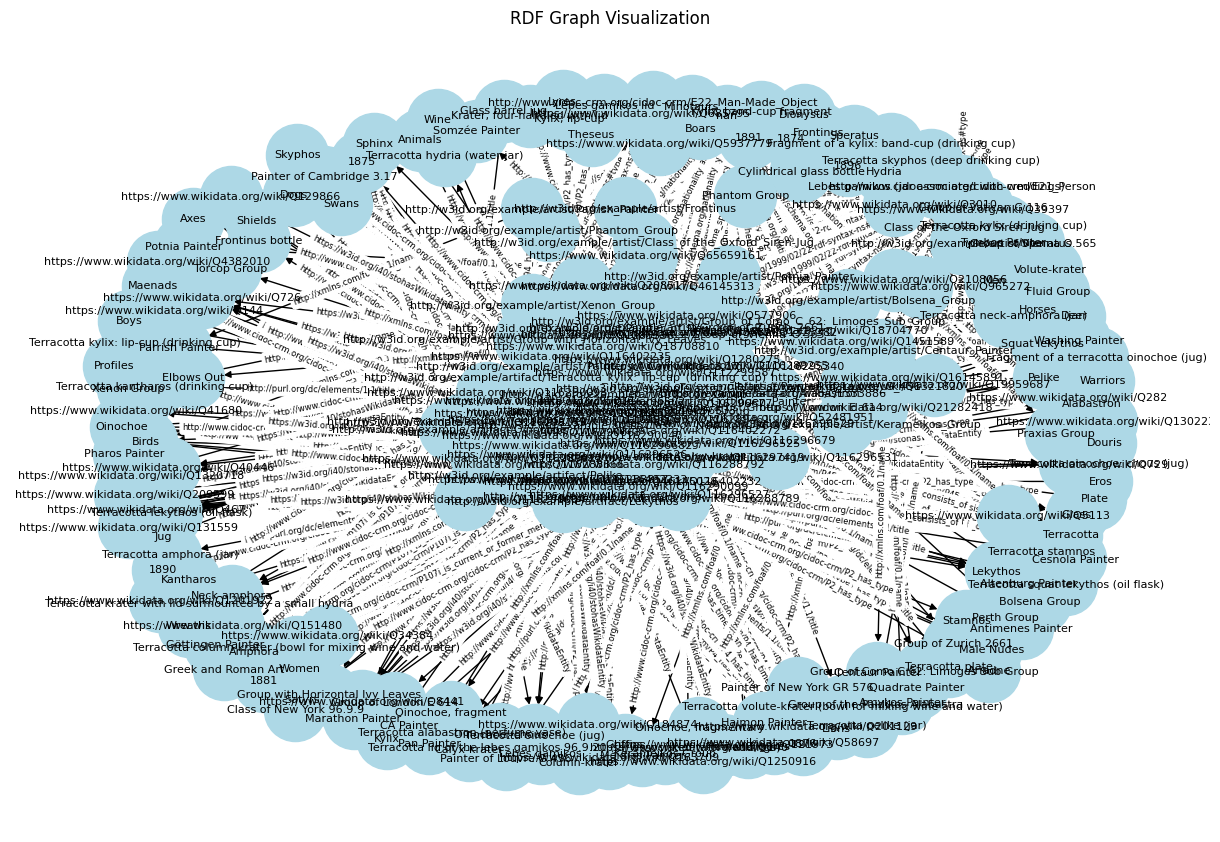

In [55]:
graph = collection.to_rdf()

visualize_rdf_graph(graph)

In [57]:
graph.connected()

True

In [59]:
ttl_data = graph.serialize(format='turtle')

with open("../03_RDF_outputs/rdf_graph.ttl", "w", encoding="utf-8") as f:
    f.write(ttl_data)